In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

This project is about data

In [3]:
majors = pd.read_csv('college-majors/all-ages.csv')
majors.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [4]:
grad_df = pd.read_csv('college-majors/grad-students.csv')
grad_df.head()

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154


In [5]:
grad_df['Diff_median'] = grad_df['Grad_median'] - grad_df['Nongrad_median']

In [6]:
stem = ['Engineering', 'Physical Sciences', 'Computers & Mathematics', 'Health', 'Biology & Life Science']

majors_stem = majors[majors['Major_category'].isin(stem)]
grad_stem_df = grad_df[grad_df['Major_category'].isin(stem)]

In [40]:
print('The average undergraduate unemployment rate is', 100 * majors['Unemployment_rate'].mean().round(4))
print('The average graduate unemployment rate is', 100 * grad_df['Grad_unemployment_rate'].mean().round(4))
print('The average undergraduate unemployment rate is', 100 * (majors['Unemployment_rate'].mean().round(4) - grad_df['Grad_unemployment_rate'].mean().round(4)))

The average undergraduate unemployment rate is 5.74
The average graduate unemployment rate is 3.93
The average undergraduate unemployment rate is 1.8099999999999998


In [7]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.titlesize": 25}
sns.set_theme(style="ticks", rc=custom_params)

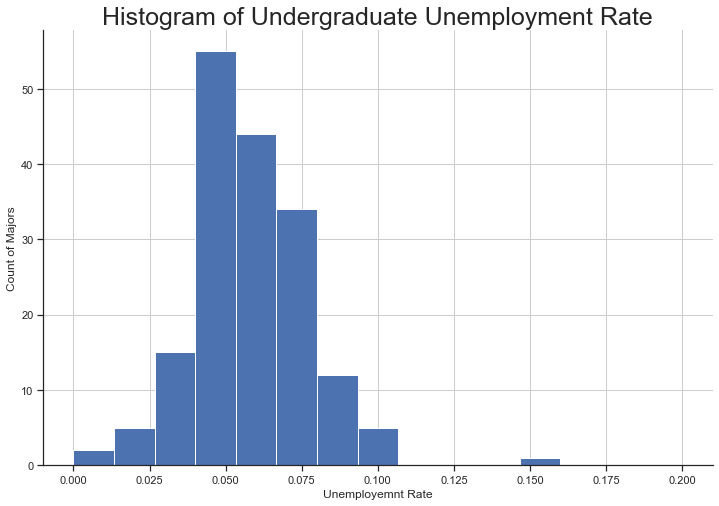

In [8]:
unemployment_hist = majors['Unemployment_rate'].hist(bins=15, range=(0,0.2), figsize=(12,8))
unemployment_hist.set_title("Histogram of Undergraduate Unemployment Rate")
unemployment_hist.set_xlabel("Unemployemnt Rate")
unemployment_hist.set_ylabel("Count of Majors")

plt.show()

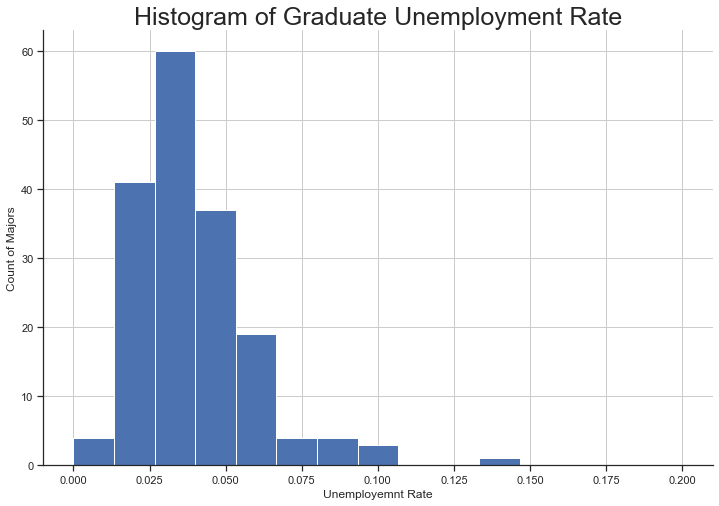

In [35]:
unemployment_hist = grad_df['Grad_unemployment_rate'].hist(bins=15, range=(0,0.2), figsize=(12,8))
unemployment_hist.set_title("Histogram of Graduate Unemployment Rate")
unemployment_hist.set_xlabel("Unemployemnt Rate")
unemployment_hist.set_ylabel("Count of Majors")

plt.show()

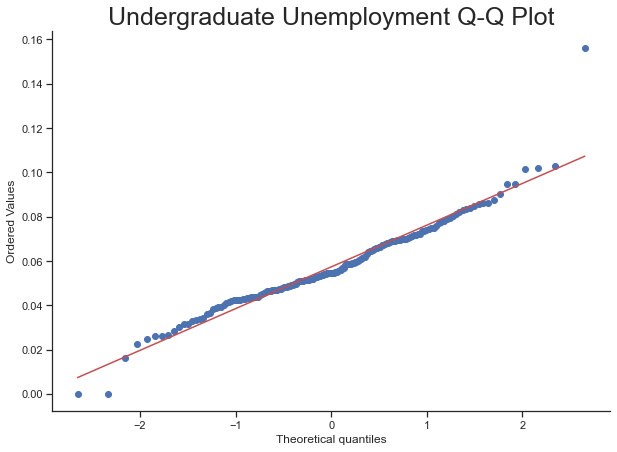

In [50]:
plt.figure(figsize=(10,7))
stats.probplot(majors['Unemployment_rate'], dist="norm", plot= plt)
plt.title("Undergraduate Unemployment Q-Q Plot")
plt.show()

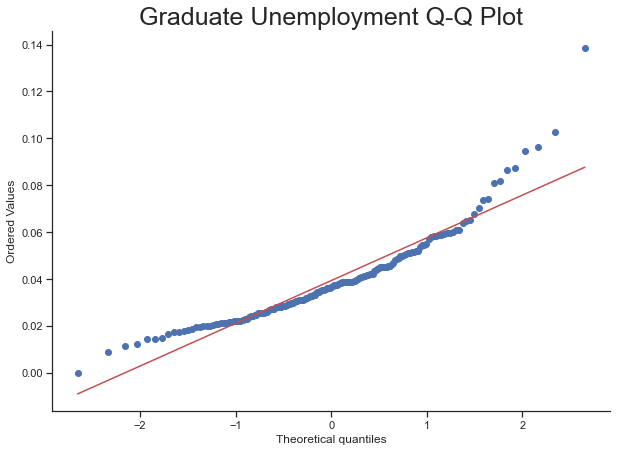

In [52]:
plt.figure(figsize=(10,7))
stats.probplot(grad_df['Grad_unemployment_rate'], dist="norm", plot= plt)
plt.title("Graduate Unemployment Q-Q Plot")
plt.show()

In [53]:
stats.ttest_rel(majors['Unemployment_rate'], grad_df['Grad_unemployment_rate'])

Ttest_relResult(statistic=8.318880012182316, pvalue=2.624753483772348e-14)

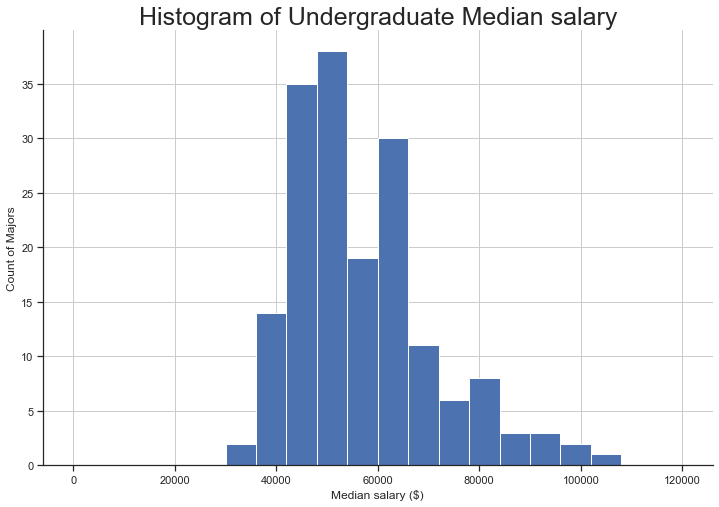

In [10]:
salary_hist = majors['Median'].hist(bins=20, range=(0, 120000), figsize=(12,8))
salary_hist.set_title("Histogram of Undergraduate Median salary")
salary_hist.set_xlabel("Median salary ($)")
salary_hist.set_ylabel("Count of Majors")

plt.show()

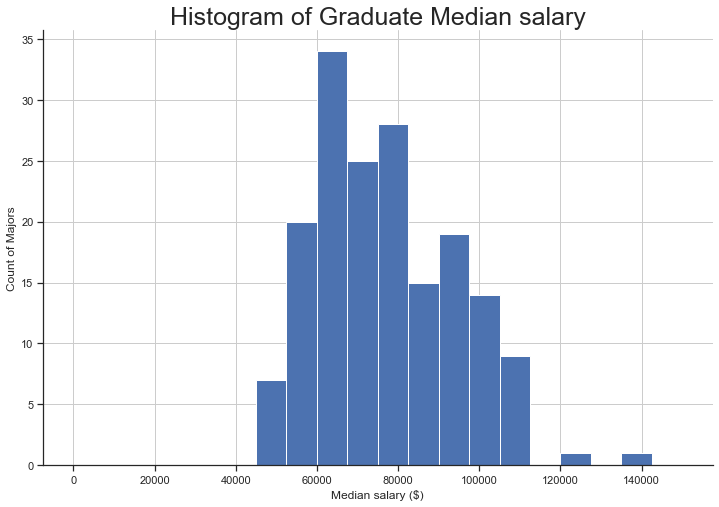

In [11]:
salary_hist = grad_df['Grad_median'].hist(bins=20, range=(0, 150000), figsize=(12,8))
salary_hist.set_title("Histogram of Graduate Median salary")
salary_hist.set_xlabel("Median salary ($)")
salary_hist.set_ylabel("Count of Majors")

plt.show()

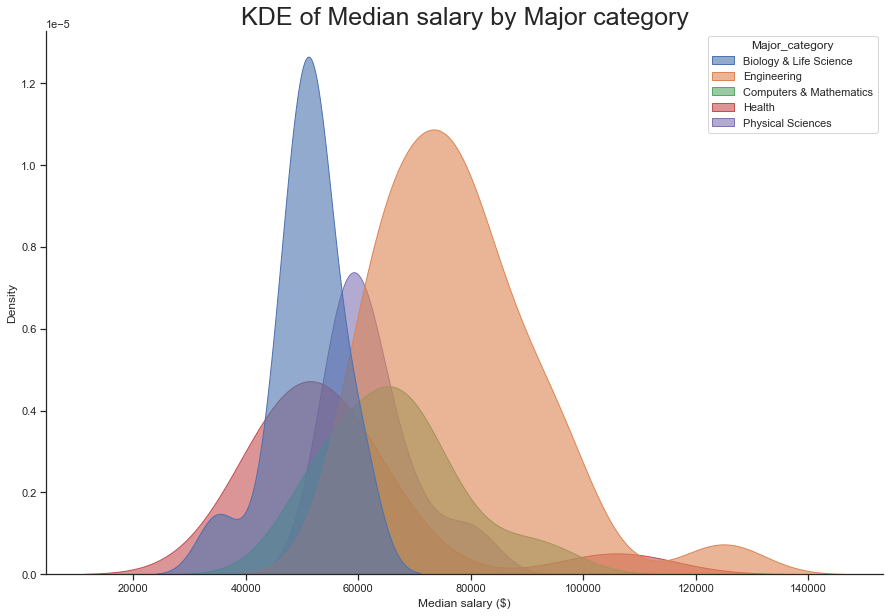

In [12]:
plt.figure(figsize=(15,10))

# Create kde plot and its components 
kde_plot = sns.kdeplot(x = "Median", data = majors_stem, fill = True, alpha = .6, hue = "Major_category", legend = True)
kde_plot.set_title("KDE of Median salary by Major category")
kde_plot.set_xlabel("Median salary ($)")

# Show
plt.show()

In [13]:
avg_salary = majors.groupby('Major_category')['Median'].mean().reset_index(name = 'avg_salary').sort_values('avg_salary', ascending = False)
grad_avg_salary = grad_df.groupby('Major_category')['Grad_median'].mean().reset_index(name = 'avg_salary').sort_values('avg_salary', ascending = False)

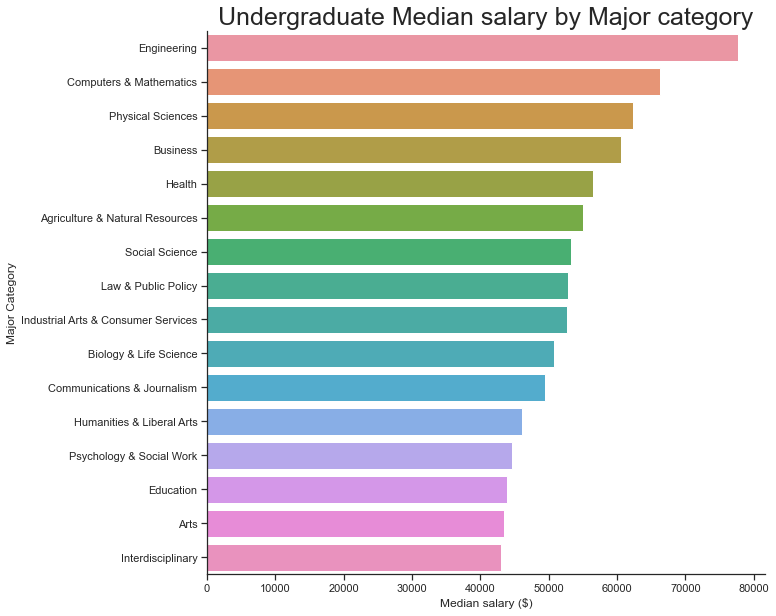

In [14]:
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_salary', y = 'Major_category', data = avg_salary, orient = 'h', ci = None)
salary_bar.set_title("Undergraduate Median salary by Major category")
salary_bar.set_xlabel("Median salary ($)")
salary_bar.set_ylabel("Major Category")

plt.show()

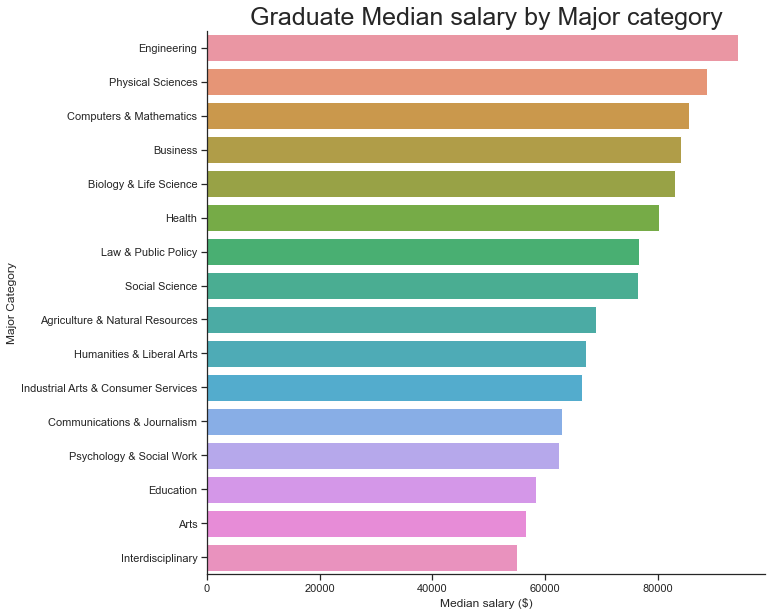

In [15]:
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_salary', y = 'Major_category', data = grad_avg_salary, orient = 'h', ci = None)
salary_bar.set_title("Graduate Median salary by Major category")
salary_bar.set_xlabel("Median salary ($)")
salary_bar.set_ylabel("Major Category")

plt.show()

In [16]:
avg_diff = grad_df.groupby('Major_category')['Diff_median'].mean().reset_index(name = 'avg_diff').sort_values('avg_diff', ascending = False)

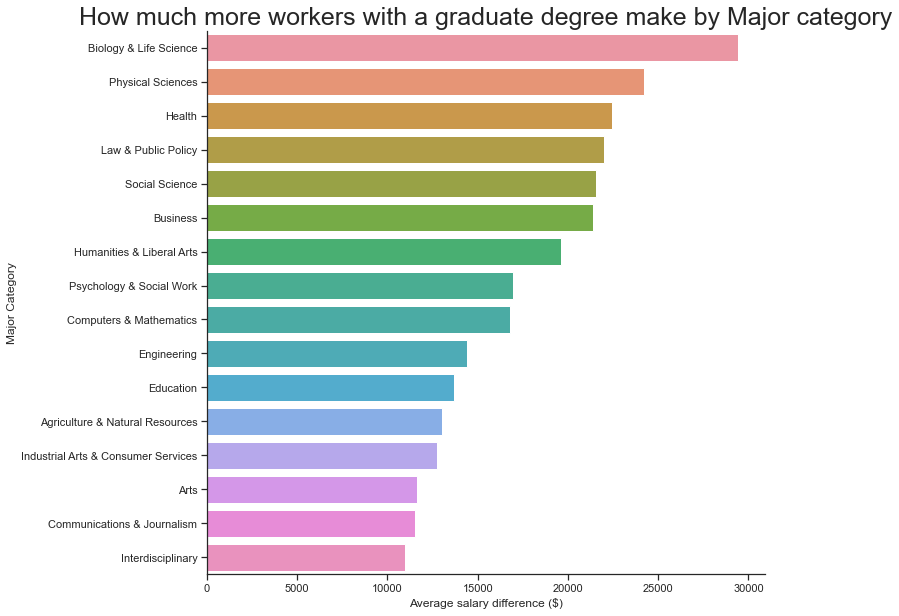

In [17]:
plt.figure(figsize=(10, 10))
salary_bar = sns.barplot(x = 'avg_diff', y = 'Major_category', data = avg_diff, orient = 'h', ci = None)
salary_bar.set_title("How much more workers with a graduate degree make by Major category")
salary_bar.set_xlabel("Average salary difference ($)")
salary_bar.set_ylabel("Major Category")

plt.show()

In [18]:
majors_health = majors_stem[majors_stem['Major_category'] == 'Health']

In [19]:
health_sorted = majors_health.sort_values('Median', ascending = False)

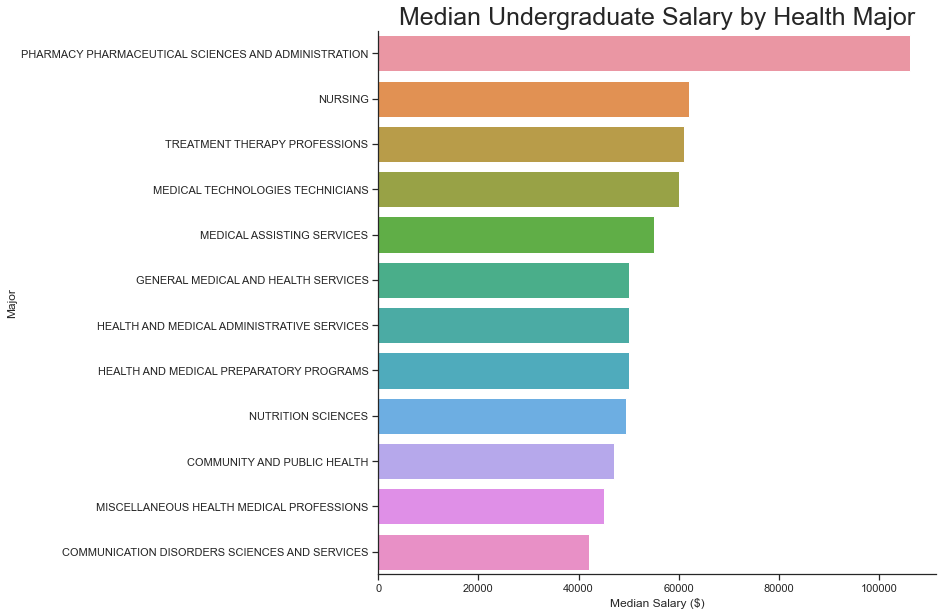

In [20]:
plt.figure(figsize=(10, 10))
health_bar = sns.barplot(x = 'Median', y = 'Major', data = health_sorted, orient = 'h', ci = None)
health_bar.set_title("Median Undergraduate Salary by Health Major")
health_bar.set_xlabel("Median Salary ($)")
health_bar.set_ylabel("Major")

plt.show()

In [21]:
grad_health_df = grad_df[grad_df['Major_category'] == 'Health']

In [22]:
grad_health_sorted = grad_health_df.sort_values('Grad_median', ascending = False)

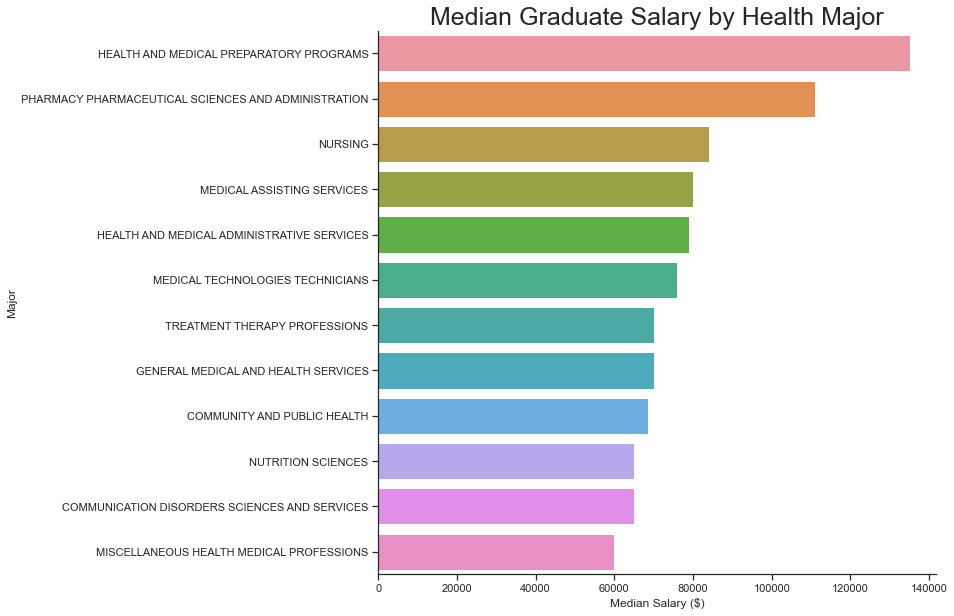

In [23]:
plt.figure(figsize=(10, 10))
grad_health_bar = sns.barplot(x = 'Grad_median', y = 'Major', data = grad_health_sorted, orient = 'h', ci = None)
grad_health_bar.set_title("Median Graduate Salary by Health Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

plt.show()

In [24]:
health_diff_sorted = grad_health_df.sort_values('Diff_median', ascending = False)

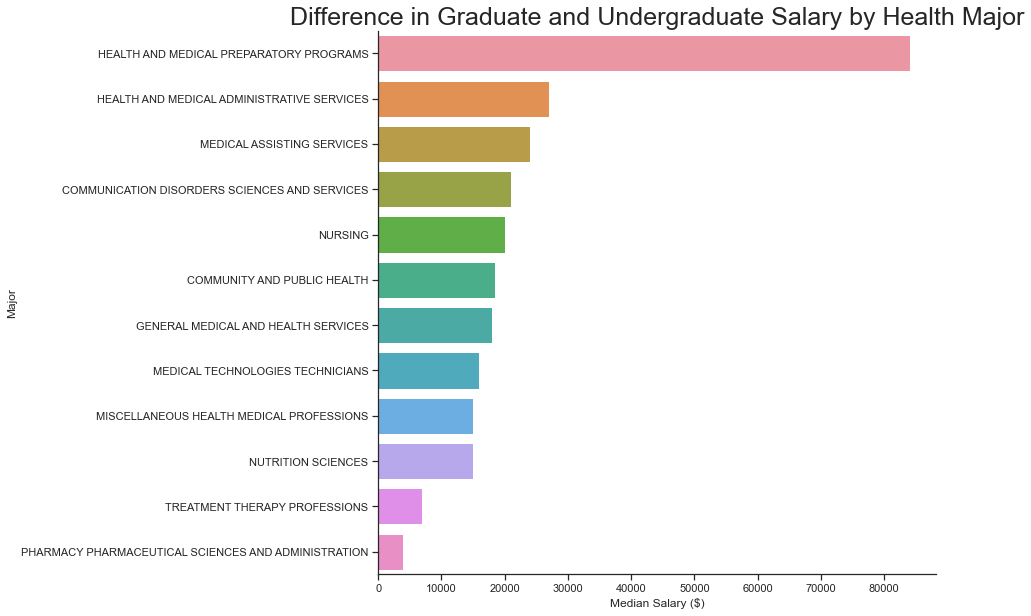

In [25]:
plt.figure(figsize=(10, 10))
grad_health_bar = sns.barplot(x = 'Diff_median', y = 'Major', data = health_diff_sorted, orient = 'h', ci = None)
grad_health_bar.set_title("Difference in Graduate and Undergraduate Salary by Health Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

plt.show()

In [26]:
diff_sorted = grad_df.groupby('Major')['Diff_median'].mean().reset_index(name = 'avg_diff').sort_values('avg_diff', ascending = False)
top_diff = diff_sorted.head()
bottom_diff = diff_sorted.tail()

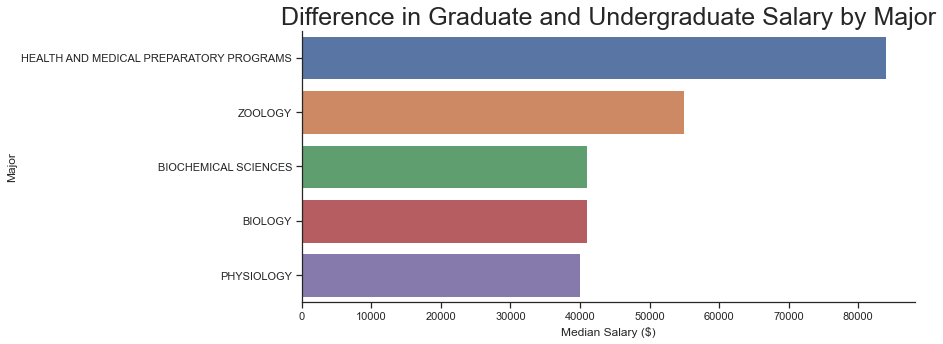

In [27]:
plt.figure(figsize=(11, 5))
grad_health_bar = sns.barplot(x = 'avg_diff', y = 'Major', data = top_diff, orient = 'h', ci = None)
grad_health_bar.set_title("Difference in Graduate and Undergraduate Salary by Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

plt.show()

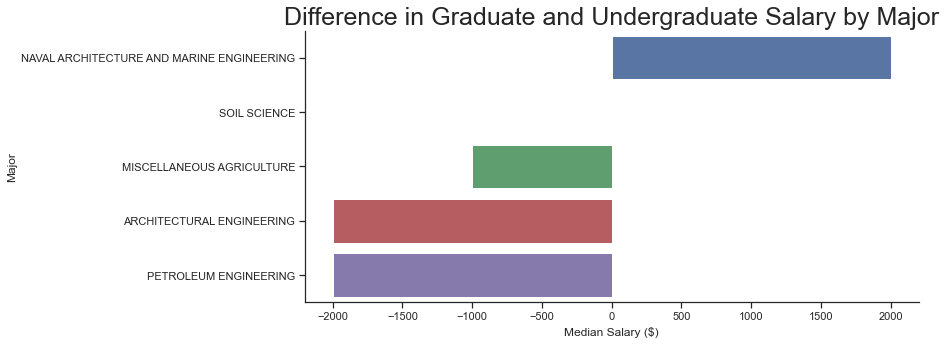

In [28]:
plt.figure(figsize=(11, 5))
grad_health_bar = sns.barplot(x = 'avg_diff', y = 'Major', data = bottom_diff, orient = 'h', ci = None)
grad_health_bar.set_title("Difference in Graduate and Undergraduate Salary by Major")
grad_health_bar.set_xlabel("Median Salary ($)")
grad_health_bar.set_ylabel("Major")

plt.show()

In [29]:
grad_salary = grad_df['Grad_median']
undergrad_salary = grad_df['Nongrad_median']

In [30]:
print('The average graduate salary is: $', grad_salary.mean().round(2))
print('The average undergraduate salary is: $', undergrad_salary.mean().round(2))
print('People with graduate degrees make $', grad_df['Diff_median'].mean().round(2),'more on avergae')

The average graduate salary is: $ 76755.78
The average undergraduate salary is: $ 58583.82
People with graduate degrees make $ 18171.97 more on avergae


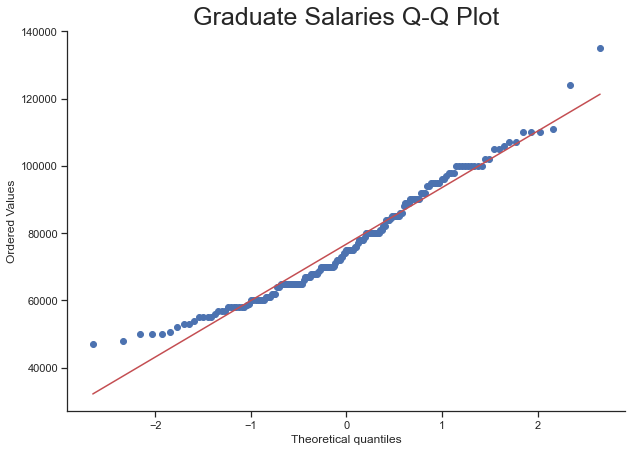

In [55]:
plt.figure(figsize = (10,7))
stats.probplot(grad_salary, dist="norm", plot= plt)
plt.title("Graduate Salaries Q-Q Plot")
plt.show()

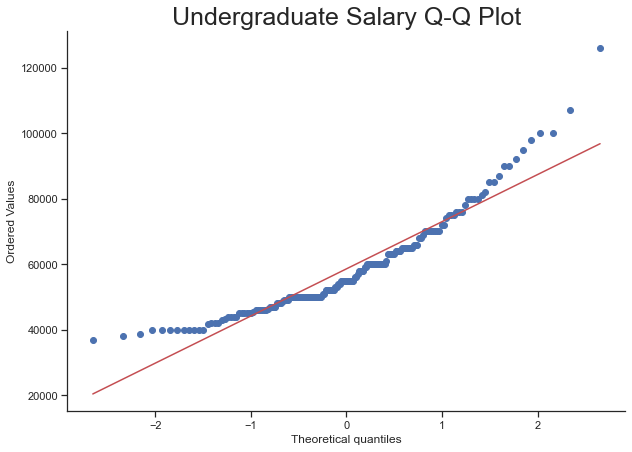

In [54]:
plt.figure(figsize = (10,7))
stats.probplot(undergrad_salary, dist="norm", plot= plt)
plt.title("Undergraduate Salary Q-Q Plot")
plt.show()

In [34]:
stats.ttest_rel(grad_salary, undergrad_salary)

Ttest_relResult(statistic=24.05493208083536, pvalue=6.421691649898644e-57)